In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-life-expectancy-around-the-world/Human_life_Expectancy.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the file
my_data=pd.read_csv("../input/human-life-expectancy-around-the-world/Human_life_Expectancy.csv")

#Getting all columns
print(my_data.columns)

#First 5 lines data
my_data.head()

#Cheking is there a null values
my_data.isnull().values.any()


Index(['Country', 'Country_Code', 'Level', 'Region', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')


False

In [4]:
#Getting all max values in data from special country
#Here we got max age that was registred in USA
data_usa=my_data.loc[(my_data.Country=='United States')]
data_usa_max=data_usa.max()
data_usa_max

Country         United States
Country_Code              USA
Level             subnational
Region                Wyoming
1990                    78.46
1991                    78.61
1992                    78.75
1993                    78.78
1994                    78.93
1995                    79.07
1996                    79.13
1997                     79.3
1998                    79.37
1999                    79.54
2000                    79.61
2001                    79.78
2002                    79.85
2003                    80.02
2004                    80.19
2005                    80.36
2006                    80.47
2007                    80.58
2008                    80.69
2009                     80.8
2010                    80.91
2011                    81.06
2012                    81.21
2013                    81.25
2014                     81.3
2015                     81.3
2016                     81.3
2017                     81.3
2018                     81.3
2019      

In [5]:
#Got the exact number of people of each country 
people_in_countries=my_data.groupby('Country').Country.count().sort_values(ascending=False)
people_in_countries


Country
United States            52
Nigeria                  38
India                    37
Colombia                 34
Mexico                   33
                         ..
Samoa                     1
Cyprus                    1
Brunei Darussalam         1
Singapore                 1
Saint Kitts and Nevis     1
Name: Country, Length: 186, dtype: int64

In [6]:
#Reorganazing the data
organized_data=pd.melt(my_data,id_vars=['Country','Country_Code','Level','Region'],
                   value_vars=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
                   var_name=['Year'],value_name='Expectation')

organized_data.shape
organized_data.head()
#Droping "Not Available data"
organized_data = organized_data.drop(organized_data[organized_data.Expectation == 'Not Available'].index)
#Transformation to numeric values
organized_data[["Year","Expectation"]] = organized_data[["Year","Expectation"]].apply(pd.to_numeric)

'\nHere we see that Hawai got the most huge expectancy of huma life,perhaps the beach and taste cocktails influence on  human life :D\n\n'

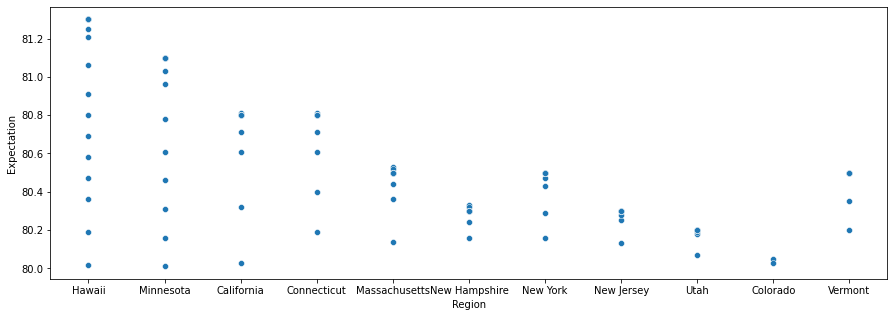

In [7]:
usa_data = organized_data.query("Country_Code == 'USA'")
usa_data.head


# Scatter Plot 
usa_data.describe()
#Getting the relationship between the Region and lifespan expectation in USA which is higher than 80
usa_data_expect_more80=usa_data[usa_data['Expectation']>80]
usa_data_expect_more80.head

plt.figure(figsize=(15,5))
sns.scatterplot(x=usa_data_expect_more80['Region'], y=usa_data_expect_more80['Expectation'])

'''
Here we see that Hawai got the most huge expectancy of huma life,perhaps the beach and taste cocktails influence on  human life :D

'''

In [8]:
#Getting the countries with lower life expectation which is less than 40
lower_life_expect=organized_data.loc[(organized_data.Expectation>0) & (organized_data.Expectation<40)]
lower_life_expect.shape
lower_life_expect.head()

,Country,Country_Code,Level,Region,Year,Expectation
1505,Rwanda,RWA,National,Total,1990,33.40
1506,Rwanda,RWA,subnational,City of Kigali,1990,35.12
1507,Rwanda,RWA,subnational,East,1990,30.82
1508,Rwanda,RWA,subnational,North,1990,32.37
1509,Rwanda,RWA,subnational,South,1990,33.44


'\nHere, we that the most less expectancy of life is in Rwanda country specially between 1991 and 1995\n\nAccording to Wikipedia (https://en.wikipedia.org/wiki/Rwandan_genocide):\nThe Rwandan genocide occurred between 7 April and 15 July 1994 during the Rwandan Civil War.\nDuring this period of around 100 days, members of the Tutsi minority ethnic group, as well as some moderate Hutu and Twa, were slaughtered by armed militias. \nThe most widely accepted scholarly estimates are around 500,000 to 800,000 Tutsi deaths.\nEstimates for the total death toll (including Hutu and Twa victims) are as high as 1,100,000.\n\n'

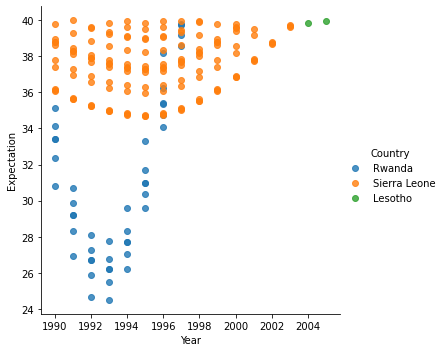

In [9]:
#Plotting this relationship
sns.lmplot(x='Year', y='Expectation', data=lower_life_expect, hue='Country', fit_reg=False)
'''
Here, we that the most less expectancy of life is in Rwanda country specially between 1991 and 1995

According to Wikipedia (https://en.wikipedia.org/wiki/Rwandan_genocide):
The Rwandan genocide occurred between 7 April and 15 July 1994 during the Rwandan Civil War.
During this period of around 100 days, members of the Tutsi minority ethnic group, as well as some moderate Hutu and Twa, were slaughtered by armed militias. 
The most widely accepted scholarly estimates are around 500,000 to 800,000 Tutsi deaths.
Estimates for the total death toll (including Hutu and Twa victims) are as high as 1,100,000.

'''

               Year  Expectation
Country                         
Japan        2004.5    81.933333
Switzerland  2004.5    80.853333
Iceland      2004.5    80.693333
Andorra      2009.5    80.665000
Australia    2004.5    80.540000
(186, 2)


'\nAs we can see during the time the countries increase their life Expectancy.\n\n'

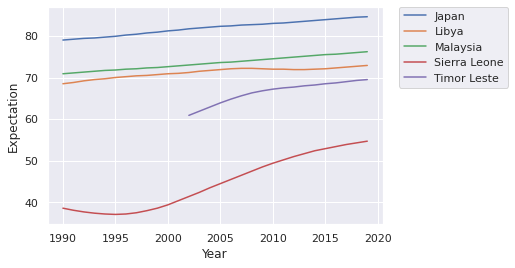

In [10]:

#Extraction the information  with national level
national_organized_data=organized_data[organized_data['Level']=='National']
national_organized_data.head()
#Getting the top 5 countries with huge mean Expectancy
sorted_national_organized_data=national_organized_data.groupby('Country').mean().sort_values('Expectation',ascending=False)
top5=sorted_national_organized_data.head()
print(top5)

'''
The top 5 countries with huge Expectancy of life are: Japan,Switzerland,Iceland,Andorra,Australia
Does anybody know where is Andora?
https://upload.wikimedia.org/wikipedia/commons/1/12/Location_Andorra_Europe.png


'''
#Getting the name of countries of sorted_national_organized_data.describe() (*min,25%,mean,75%,max*) values
#just to see the average increase of life expectancy
print(sorted_national_organized_data.shape)

first=sorted_national_organized_data.iloc[0]#max
last=sorted_national_organized_data.iloc[-1]#min
percent_25=sorted_national_organized_data.iloc[61]#186/3-1
percnet_75=sorted_national_organized_data.iloc[123]#186-186/3-1
avg=sorted_national_organized_data.iloc[92]#median



sns.set(style="darkgrid")
data_of_describes=organized_data.loc[((organized_data.Country=='Japan')|(organized_data.Country=='Malaysia')|(organized_data.Country=='Libya')|(organized_data.Country=='Timor Leste')|(organized_data.Country=='Sierra Leone'))&(organized_data.Level=='National')]
sns.lineplot(x='Year',y='Expectation',hue='Country',data=data_of_describes)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
'''
As we can see during the time the countries increase their life Expectancy.

'''